# **Notebook Title: National Data Buoy Center (NDBC) Timeseries Plots**
## This notebook performs the following task(s):
> - #### Plots historical buoy data as a timeseries plot.

## Import packages
#### **Links to documentation for packages:**
> - #### [pathlib](https://docs.python.org/3/library/pathlib.html) | [numpy](https://numpy.org/doc/stable/) | [xarray](https://docs.xarray.dev/en/stable/) | [pandas](https://pandas.pydata.org/docs/) | [matplotlib](https://matplotlib.org/stable/index.html) | 
> - #### Note #1: Documentation for packages linked above correspond to the most stable versions, which may not be the exact versions used when creating this notebook.
> - #### Note #2: Comments are also included in the actual code cells. Commented links above certain pieces of code are provided to help show where some lines were copied from. It is possible that there may still be snippets of code here that were simply grabbed off the internet, from places like StackOverflow, without any atribution.

In [65]:
#-------------------------------------------------
#Import packages
import pathlib
import numpy as np
import xarray as xr
import pandas as pd
#-------------------------------------------------
#Matplotlib imports
import matplotlib.patheffects
import matplotlib.pyplot as plt
#-------------------------------------------------

## Define paths to data

#### **Data Information**

> - #### **NDBC Historical Standard Meteorological Data**
>> - #### NDBC historical standard meteorological data was downloaded and converted to NetCDF files using the **"code_download_ndbc_historical.ipynb"** notebook, which can be found in this repository.
>> - #### For more information regarding NDBC historical standard meteorological data see this [link](https://www.ndbc.noaa.gov/faq/measdes.shtml).
>> - #### Current buoy stations that we have downloaded data for are:
>>> - #### East Santa Barbara Buoy (Station 46053; [link to live data from NDBC](https://www.ndbc.noaa.gov/station_page.php?station=46053))
>>> - #### West Santa Barbara Buoy (Station 46054; [link to live data from NDBC](https://www.ndbc.noaa.gov/station_page.php?station=46054))
>>> - #### Harvest Buoy (Station 46218; [link to live data from NDBC](https://www.ndbc.noaa.gov/station_page.php?station=46218))
>>> - #### **Note:** The Harvest buoy is maintained by the Coastal Data Information Program [CDIP](https://cdip.ucsd.edu/). However, you can access a good chunk of its data from NDBC, which is the data repository that was used in this work.

In [66]:
#-------------------------------------------------
#Define path and corresponding glob to data
path_to_ndbc_data = sorted(pathlib.Path('../data/').glob('*'))

#Display glob to make sure we have files
display(path_to_ndbc_data)
#-------------------------------------------------

[PosixPath('../data/ndbc_historical_1994_to_2023_46053'),
 PosixPath('../data/ndbc_historical_1994_to_2023_46054'),
 PosixPath('../data/ndbc_historical_2004_to_2023_46218')]

## Open a single NetCDF data file so we can see the file structure and variables
#### **Notes**

> - ####

In [46]:
#-------------------------------------------------
#Display one open NetCDF file using xarray
display(xr.open_dataset(path_to_ndbc_data[0]))
#-------------------------------------------------

<xarray.Dataset>
Dimensions:                  (date: 619563)
Coordinates:
  * date                     (date) datetime64[ns] 1994-01-01T01:00:00 ... 20...
Data variables:
    wind_dir_deg             (date) float64 ...
    wind_spd_ms              (date) float64 ...
    wind_gst_ms              (date) float64 ...
    wave_height_m            (date) float64 ...
    dom_wave_period_sec      (date) float64 ...
    average_wave_period_sec  (date) float64 ...
    mean_wave_dir_deg        (date) float64 ...
    pressure_hpa             (date) float64 ...
    air_temp_c               (date) float64 ...
    water_temp_c             (date) float64 ...
    dewpoint_c               (date) float64 ...

## Plot the raw timeseries data for each buoy we have data for
#### **The cell does the following:**
> - #### Sets up our plotting figure, which consists of a panel for each buoy we want to plot data for
> - #### Iteratively reads in the "Significant Wave Height" variable from each buoy, resamples the data to monthly resolution, computes a monthly mean value, and converts the unit from meters (m) to feet (ft).
> - #### Plots the monthly averaged data.
> - #### Timezone for all plots is UTC. This does not really matter since we computed monthly means for the data, but it is good to always keep this in mind if aggregating the data other ways.

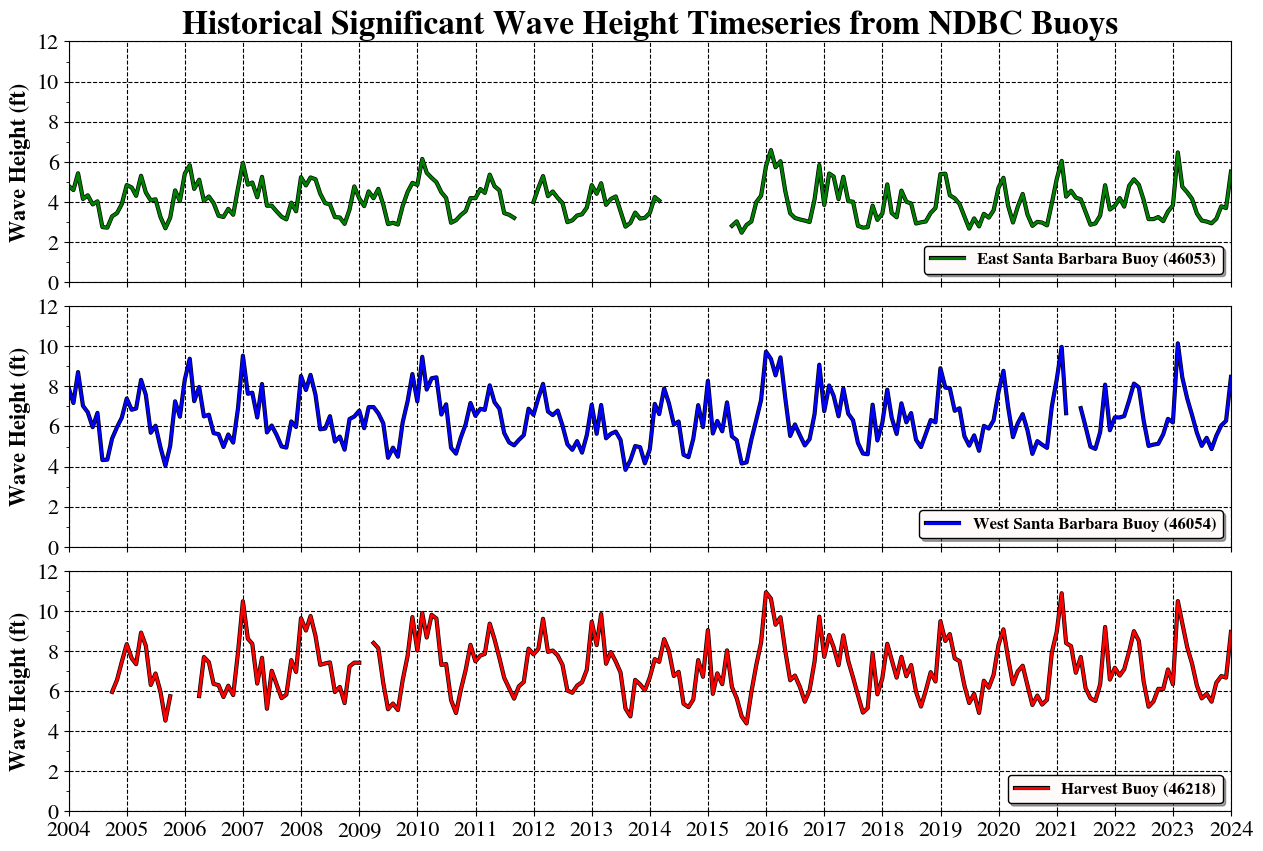

In [91]:
#-------------------------------------------------
#Set up plotting window
fig, axs = plt.subplots(nrows=len(path_to_ndbc_data), ncols=1, sharex=True, figsize=(15,10), gridspec_kw={'hspace':0.10})

#Define a string which represents the variable we want to plot
var_str = 'wave_height_m'

#Define a string which represents the y-axis label we want to place on the plot
yaxis_str = 'Wave Height (ft)'

#Define a string which represents the plot title that we want to show
title_str = 'Historical Significant Wave Height Timeseries from NDBC Buoys'

#Define a conversion factor if we want to convert the variable be plotting to a different unit
conversion_factor = 3.28084 #convert meters to feet

#Define a list of strings which represent the order of the buoys
buoy_station_str_list = ['East Santa Barbara Buoy (46053)', 'West Santa Barbara Buoy (46054)', 'Harvest Buoy (46218)']

#Define a list of line color strings that will be used when plotting
line_color_str_list   = ['green', 'blue', 'red']

#Define dictionaries for plotting
fontdict_xtick_labels    = {'fontsize': 16, 'fontweight': 'normal', 'fontname': 'Nimbus Roman'}
fontdict_ytick_labels    = {'fontsize': 16, 'fontweight': 'normal', 'fontname': 'Nimbus Roman'}
fontdict_xaxis_labels    = {'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Nimbus Roman'}
fontdict_yaxis_labels    = {'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Nimbus Roman'}
fontdict_text_color_bar  = {'fontsize': 18, 'fontweight': 'normal', 'fontname': 'Nimbus Roman'}
fontdict_text_annotation = {'fontsize': 12, 'fontweight': 'normal', 'fontname': 'Nimbus Roman'}
fontdict_title_labels    = {'fontsize': 24, 'fontweight': 'bold', 'fontname': 'Nimbus Roman'}
fontdict_legend_labels   = {'size': 12, 'weight': 'bold', 'family':'Nimbus Roman'}
#-------------------------------------------------
#For each subplot we have, do the following:
for ax_index, (ax, file_path) in enumerate(zip(axs.flatten(), path_to_ndbc_data)):
                                           
    #Open NetCDF file
    ds = xr.open_dataset(file_path)
        
    #Grab the variable we want to plot
    #Resample the variable to monthly groups and take mean of monthly groups
    #Finally, apply a conversion factor to convert units
    da = ds[var_str].resample({'date':'M'}).mean()*conversion_factor

    #Define major ytick levels
    y_min_major  = 0
    y_max_major  = 12
    y_step_major = 2
    yticks_major = np.arange(y_min_major,y_max_major+y_step_major, y_step_major)

    #Define minor ytick levels
    y_min_minor  = 0
    y_max_minor  = 12
    y_step_minor = 1
    yticks_minor = np.arange(y_min_minor,y_max_minor+y_step_minor, y_step_minor)

    #Set yaxis items
    ax.set_ylim([y_min_major,y_max_major])
    ax.set_yticks(yticks_major)
    ax.set_yticks(yticks_minor, minor=True)
    ax.set_yticklabels(yticks_major, **fontdict_ytick_labels)
    ax.set_ylabel(yaxis_str, **fontdict_yaxis_labels)
    
    #Add grid
    ax.grid(color='black', linestyle='--')

    #Add title and legend to first subplot
    if ax_index == 0:
        
        #Add title
        ax.set_title(title_str, **fontdict_title_labels)
    
    #Add time-aware x-axis labels to last panel in figure
    if ax_index == len(path_to_ndbc_data)-1:
    
        #Define in the UTC timezone
        xticks_utc  = pd.date_range(start='2004-01-01', end='2024-01-01', freq='YS')
        xticklabels = xticks_utc.year

        #Set xaxis items
        ax.set_xlim([xticks_utc[0],xticks_utc[-1]])
        ax.set_xticks(xticks_utc)
        ax.set_xticklabels(xticklabels, **fontdict_xtick_labels)
#-------------------------------------------------
    #Plot data
    ax.plot(da.date, da, color=line_color_str_list[ax_index], 
            label=buoy_station_str_list[ax_index], linewidth=2, 
            path_effects=[matplotlib.patheffects.Stroke(linewidth=3, foreground='black'), matplotlib.patheffects.Normal()])
    
    #Add legend
    ax.legend(loc='lower right', ncol=1, fancybox=True, 
              shadow=True, framealpha=1, facecolor='snow', 
              edgecolor='black', prop=fontdict_legend_labels)
#-------------------------------------------------
#Save figure
#plt.savefig(f'ndbc_buoy_{buoy_id}_standard_met_timeseries.png', bbox_inches='tight', dpi=500)
#-------------------------------------------------